<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی(Convolutionl Neural Networks - CNN)</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در ابتدا معماری شبکه را مشخص میکنیم.
<br>
به لایه های conv و pool دقت کنید.
<br>
قبل از اولین لایه Dense یا Fully Connected همیشه متد Flatten فراخوانی میشود تا نورون ها به صورت یک وکتور در بیایند.
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اجرا روی Colab</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [ ]:
#!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
#!mkdir dataset
#!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

In [1]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


<div style="direction:rtl;text-align:right;font-family:Tahoma">
نگاهی به تنسور وردی و خروجی هر لایه بیندازیم.
<br>
تصویر ورودی 28x28x3 بوده است
</div>

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
تصاویر مجموعه داده هدی در تابعی که قبلا نوشته ایم، load_hoda به صورت flat شده و یک وکتور در آمده اند.
<br>
در این فراخوانی طول و عرض تصاویر 28 قرار داده شده است، پس خروجی این تابع وکتورهای 784تایی است.
<br>
** دقت کنید که قبل از ورودی شبکه کانولوشنالی تصویر را به شکل اصلی خود یعنی 28x28 برگردانده ایم.**
<br>
همچنین چون تصاویر سیاه و سفید است تعداد کانال تصویر را 1 قرار داده ایم.
</div>

In [1]:
# 1. Import libraries and modules
%load_ext tensorboard
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt
import datetime

np.random.seed(123)  # for reproducibility


# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_train, y_train,
          epochs=200, batch_size=256, validation_data = (x_val, y_val), callbacks=[tensorboard])



Epoch 1/200
14/14 [==============================] - 1s 69ms/step - loss: 2.0411 - accuracy: 0.2991 - val_loss: 1.3198 - val_accuracy: 0.6800
Epoch 2/200
14/14 [==============================] - 1s 52ms/step - loss: 1.1937 - accuracy: 0.5903 - val_loss: 0.5682 - val_accuracy: 0.8450
Epoch 3/200
14/14 [==============================] - 1s 54ms/step - loss: 0.7756 - accuracy: 0.7366 - val_loss: 0.3455 - val_accuracy: 0.9000
Epoch 4/200
14/14 [==============================] - 1s 61ms/step - loss: 0.5503 - accuracy: 0.8249 - val_loss: 0.2553 - val_accuracy: 0.9250
Epoch 5/200
14/14 [==============================] - 1s 54ms/step - loss: 0.4339 - accuracy: 0.8529 - val_loss: 0.2085 - val_accuracy: 0.9500
Epoch 6/200
14/14 [==============================] - 1s 59ms/step - loss: 0.3720 - accuracy: 0.8817 - val_loss: 0.1771 - val_accuracy: 0.9500
Epoch 7/200
14/14 [==============================] - 1s 58ms/step - loss: 0.3333 - accuracy: 0.8929 - val_loss: 0.1561 - val_accuracy: 0.9600
Epoch 

14/14 [==============================] - 1s 56ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0886 - val_accuracy: 0.9800
Epoch 59/200
14/14 [==============================] - 1s 55ms/step - loss: 0.0296 - accuracy: 0.9886 - val_loss: 0.0705 - val_accuracy: 0.9850
Epoch 60/200
14/14 [==============================] - 1s 55ms/step - loss: 0.0302 - accuracy: 0.9889 - val_loss: 0.0773 - val_accuracy: 0.9850
Epoch 61/200
14/14 [==============================] - 1s 59ms/step - loss: 0.0265 - accuracy: 0.9923 - val_loss: 0.0937 - val_accuracy: 0.9850
Epoch 62/200
14/14 [==============================] - 1s 59ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0986 - val_accuracy: 0.9850
Epoch 63/200
14/14 [==============================] - 1s 57ms/step - loss: 0.0284 - accuracy: 0.9894 - val_loss: 0.0908 - val_accuracy: 0.9850
Epoch 64/200
14/14 [==============================] - 1s 63ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0715 - val_accuracy: 0.9800
Epoch 65/200

14/14 [==============================] - 1s 55ms/step - loss: 0.0095 - accuracy: 0.9966 - val_loss: 0.1262 - val_accuracy: 0.9800
Epoch 116/200
14/14 [==============================] - 1s 61ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.1151 - val_accuracy: 0.9800
Epoch 117/200
14/14 [==============================] - 1s 56ms/step - loss: 0.0138 - accuracy: 0.9963 - val_loss: 0.1498 - val_accuracy: 0.9850
Epoch 118/200
14/14 [==============================] - 1s 59ms/step - loss: 0.0107 - accuracy: 0.9957 - val_loss: 0.1489 - val_accuracy: 0.9850
Epoch 119/200
14/14 [==============================] - 1s 59ms/step - loss: 0.0089 - accuracy: 0.9966 - val_loss: 0.1421 - val_accuracy: 0.9850
Epoch 120/200
14/14 [==============================] - 1s 59ms/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.1519 - val_accuracy: 0.9850
Epoch 121/200
14/14 [==============================] - 1s 58ms/step - loss: 0.0117 - accuracy: 0.9957 - val_loss: 0.1648 - val_accuracy: 0.9800
Epoch 

Epoch 172/200
14/14 [==============================] - 1s 56ms/step - loss: 0.0109 - accuracy: 0.9954 - val_loss: 0.1307 - val_accuracy: 0.9850
Epoch 173/200
14/14 [==============================] - 1s 61ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.1430 - val_accuracy: 0.9850
Epoch 174/200
14/14 [==============================] - 1s 58ms/step - loss: 0.0070 - accuracy: 0.9971 - val_loss: 0.1759 - val_accuracy: 0.9850
Epoch 175/200
14/14 [==============================] - 1s 59ms/step - loss: 0.0051 - accuracy: 0.9974 - val_loss: 0.1766 - val_accuracy: 0.9850
Epoch 176/200
14/14 [==============================] - 1s 56ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.1770 - val_accuracy: 0.9850
Epoch 177/200
14/14 [==============================] - 1s 55ms/step - loss: 0.0070 - accuracy: 0.9966 - val_loss: 0.1924 - val_accuracy: 0.9850
Epoch 178/200
14/14 [==============================] - 1s 55ms/step - loss: 0.0071 - accuracy: 0.9971 - val_loss: 0.1782 - val_accuracy:

In [2]:
%tensorboard --logdir logs/fit

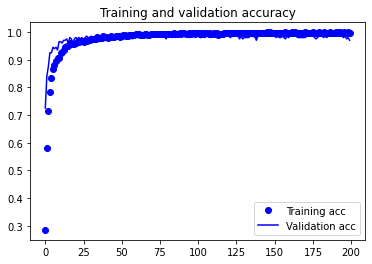

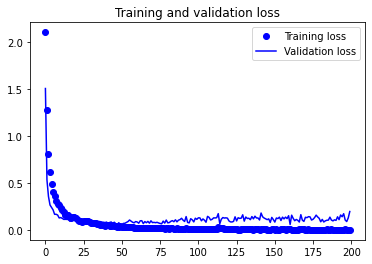

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>